In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
import pandas as pd
import pywt 

In [41]:
dados = sc.loadmat('SST.mat')
sst = dados['sst']
ssti = sst[0,0:2000]
plt.style.use('ggplot')
time= np.linspace(start=0,stop=len(ssti),num=len(ssti))


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import pywt 
def wavelet(data,time,wavelet='morl',normal=True,filtro=True,alta=False):
    if normal==True:
        data_norm = (data - data.min())/ (data.max() - data.min())
        data = data_norm
    else:
        data=data
    data = pd.Series(data).interpolate().values
    if filtro==True:
        databaixa = signal.savgol_filter(data,73,2)
        datasem = data
        data = databaixa
    else:
        data=data
    if alta==True:
        data = datasem-databaixa
    bfs, bPs = signal.welch(data)
    cA, freq = pywt.cwt(data,np.arange(1, 2000), wavelet=wavelet)
    power = (abs(cA))**2
    period = 1./freq
    plt.figure(figsize=(12,10))
    plt.subplot(211)
    plt.title('Welch')
    plt.xlabel('Frequência')
    plt.ylabel('PSD [V**2/Hz]')
    plt.plot(bfs, bPs,'r')
    
    f, ax = plt.subplots(figsize=(15, 10))
    a=ax.contourf(time, np.log2(period), np.log2(power), 100,
                extend='both')

    ax.set_title(' Wavelet Power Spectrum ' )
    ax.set_ylabel('Periodo')
    ax.set_xlabel('Frequencia')

    Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                            np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(Yticks))
    ax.set_yticklabels(Yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    plt.colorbar(a)
    plt.show()


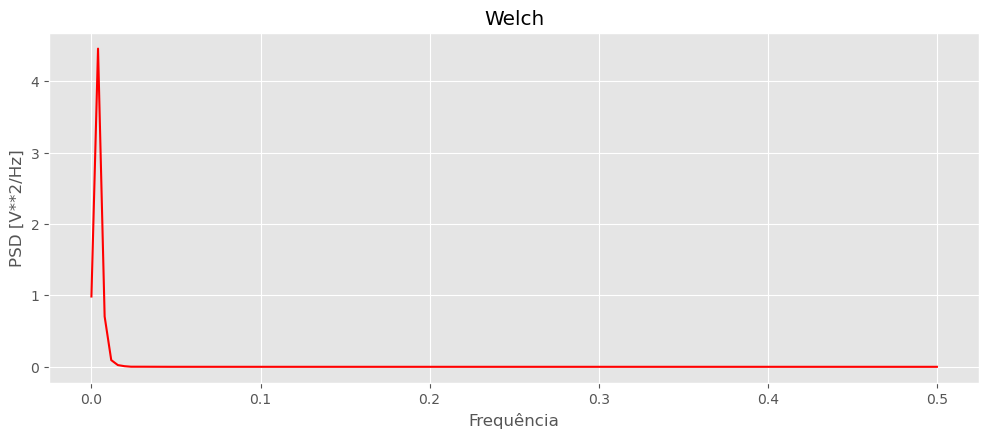

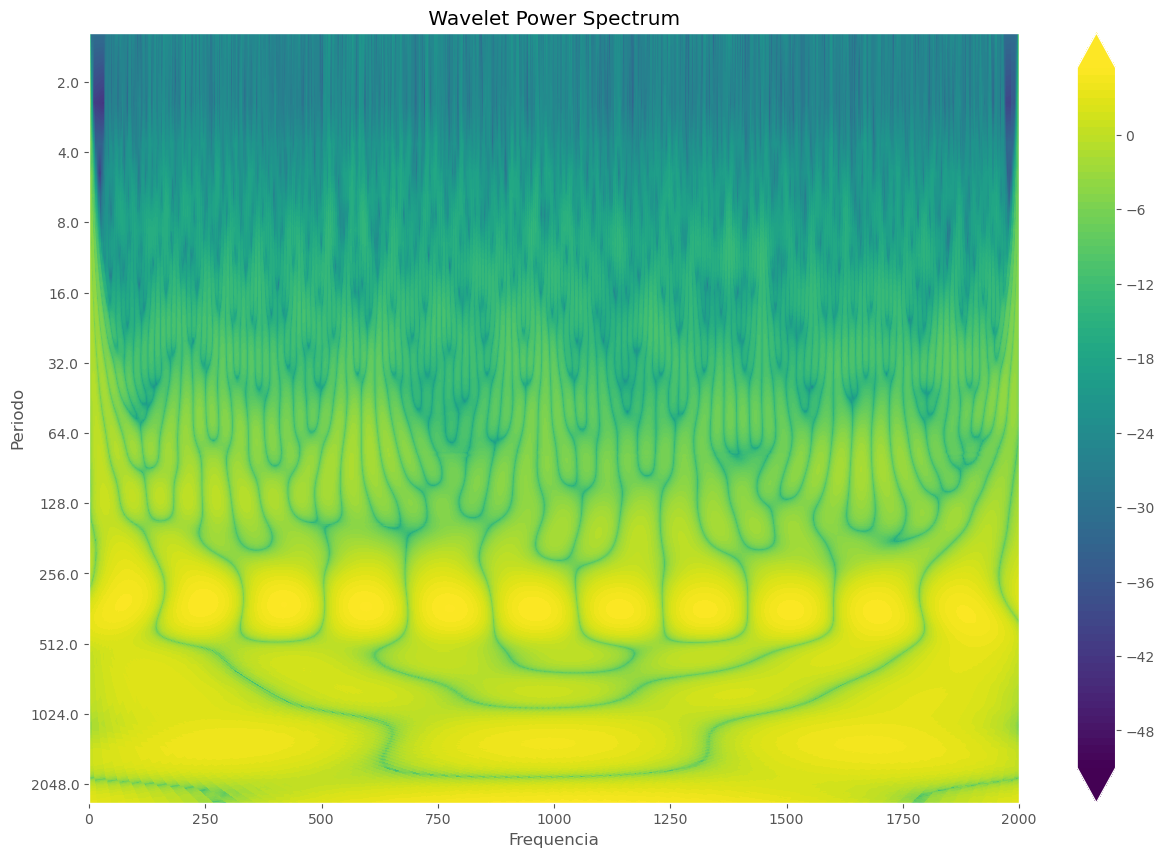

In [43]:
wavelet(ssti,time)

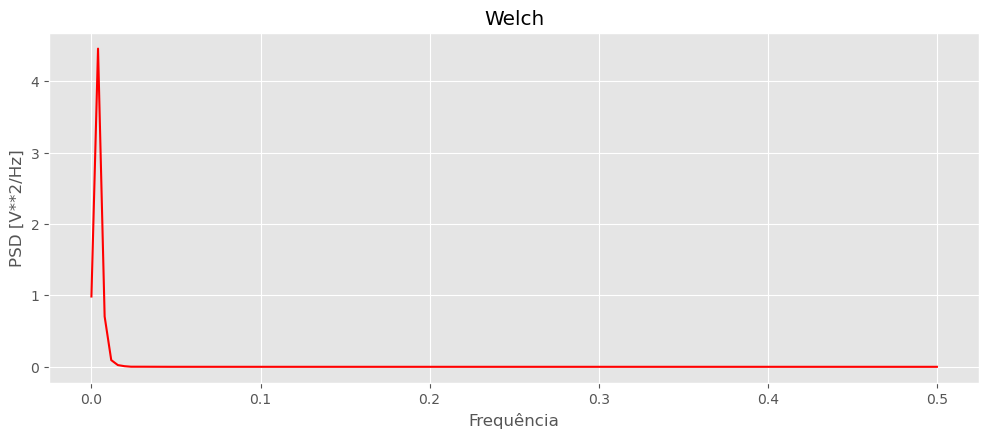

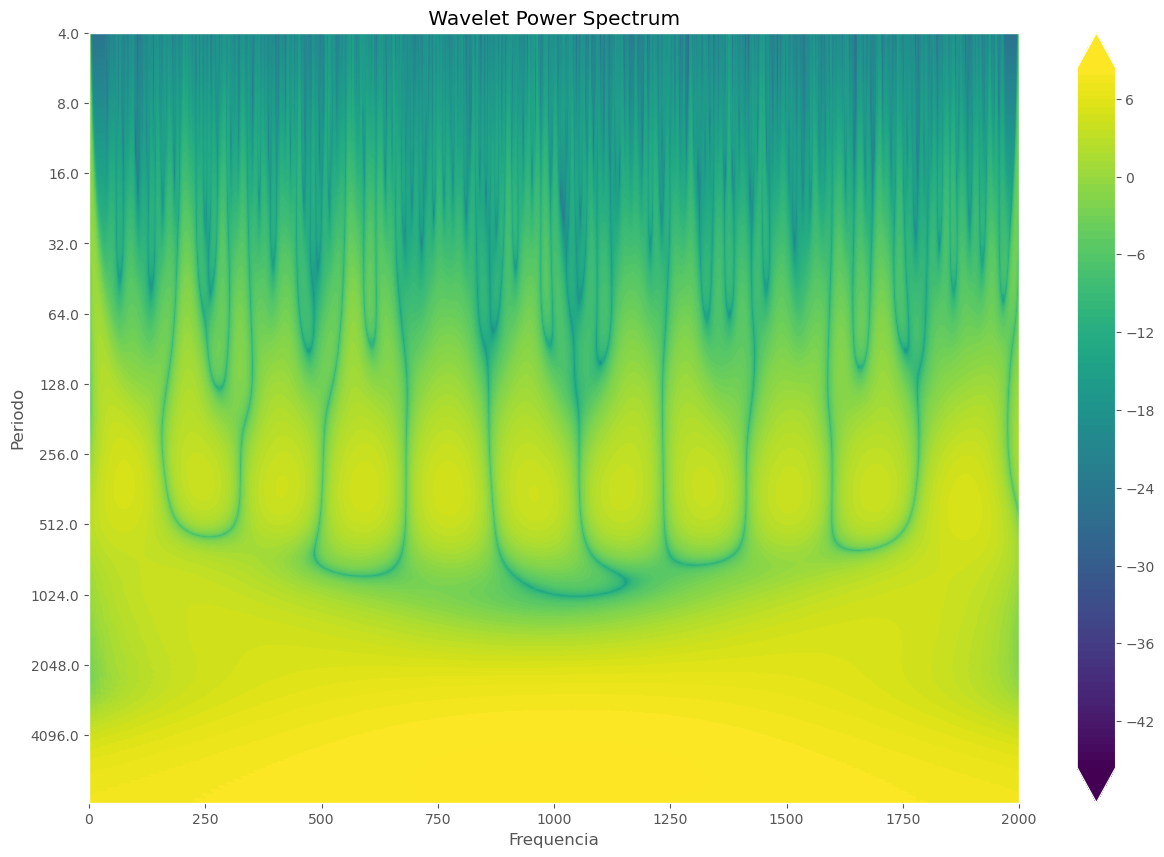

In [44]:
wavelet(ssti,time,wavelet='mexh')

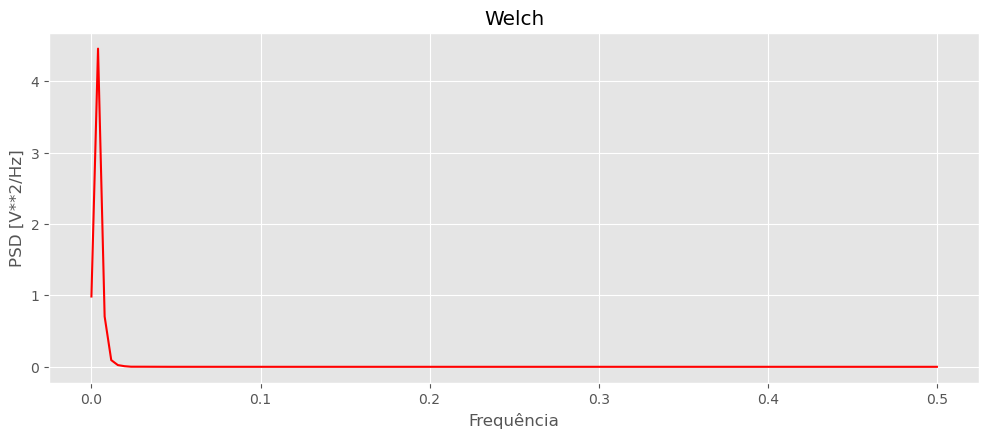

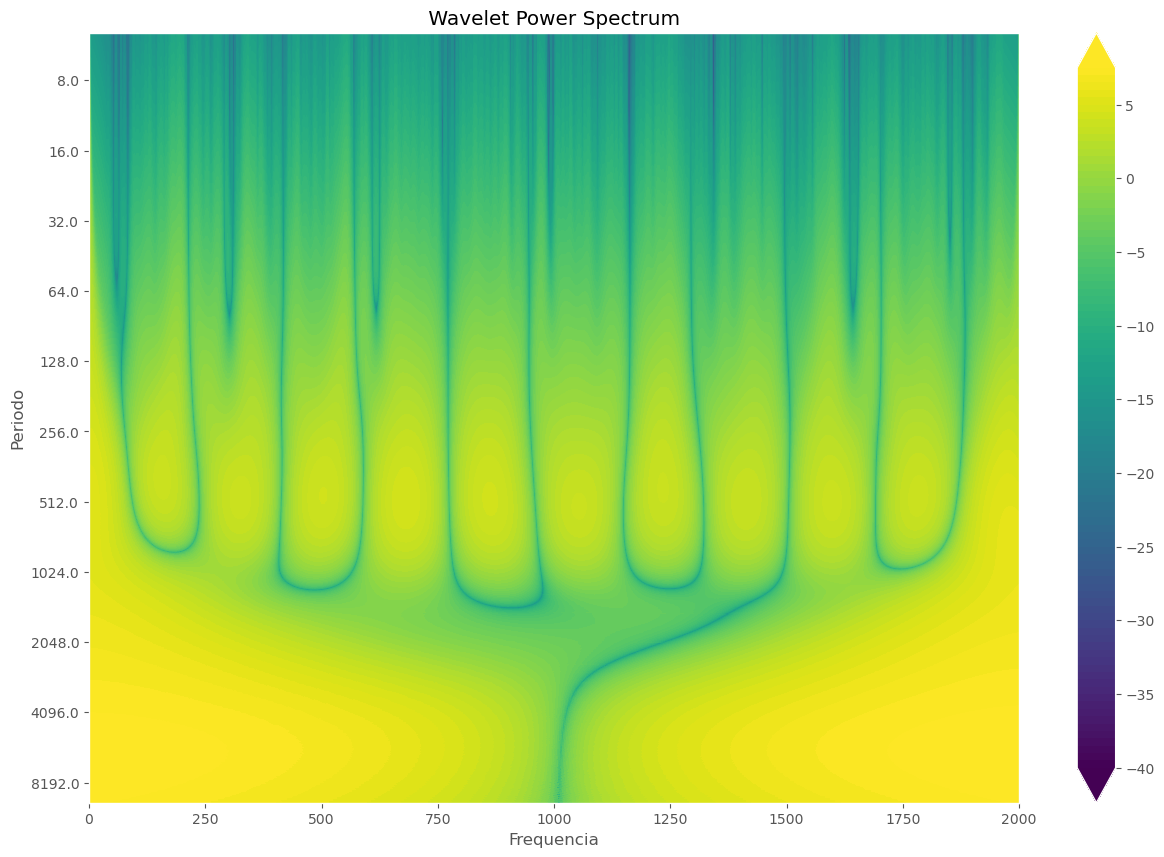

In [45]:
wavelet(ssti,time,wavelet='gaus1')

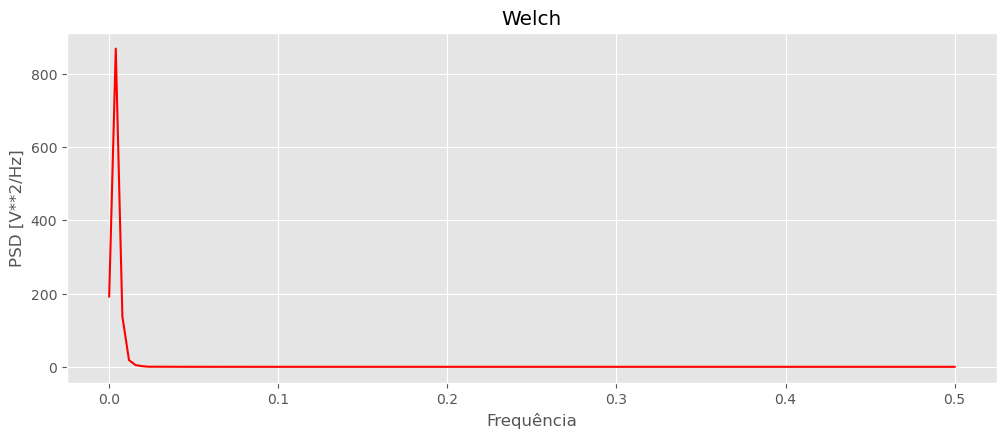

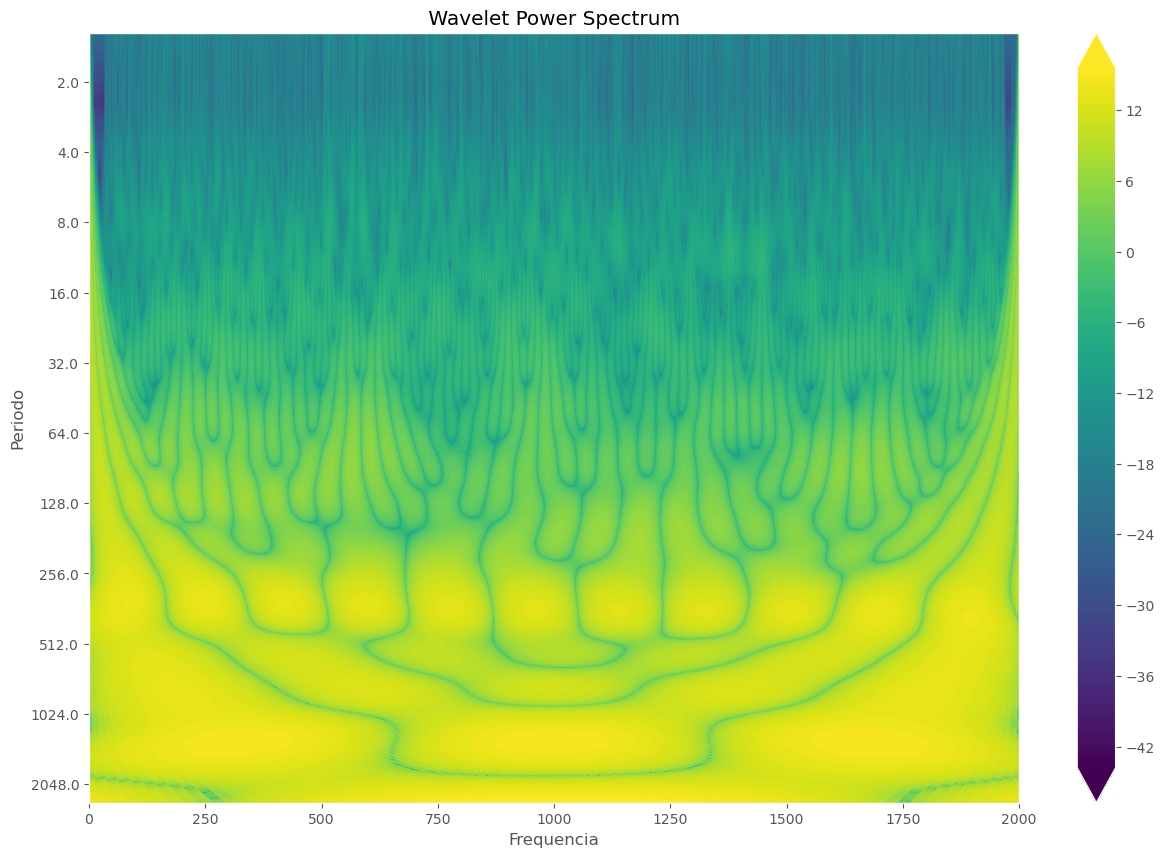

In [46]:
wavelet(ssti,time,normal=False)

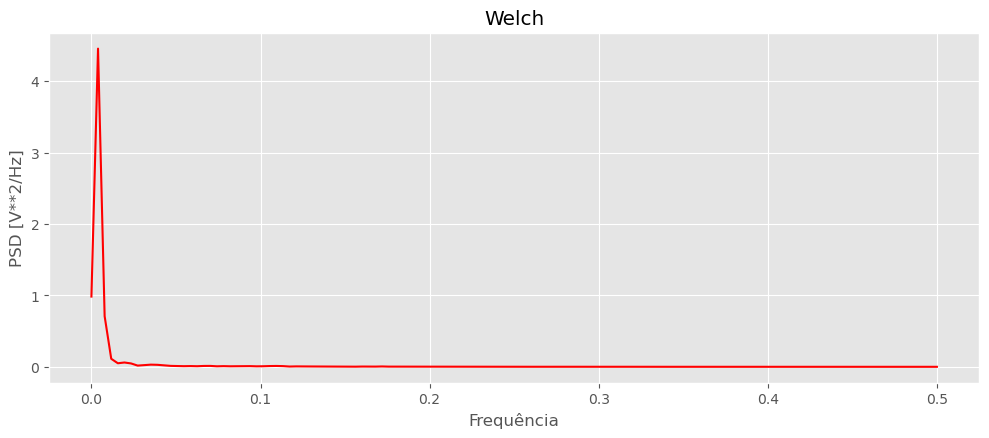

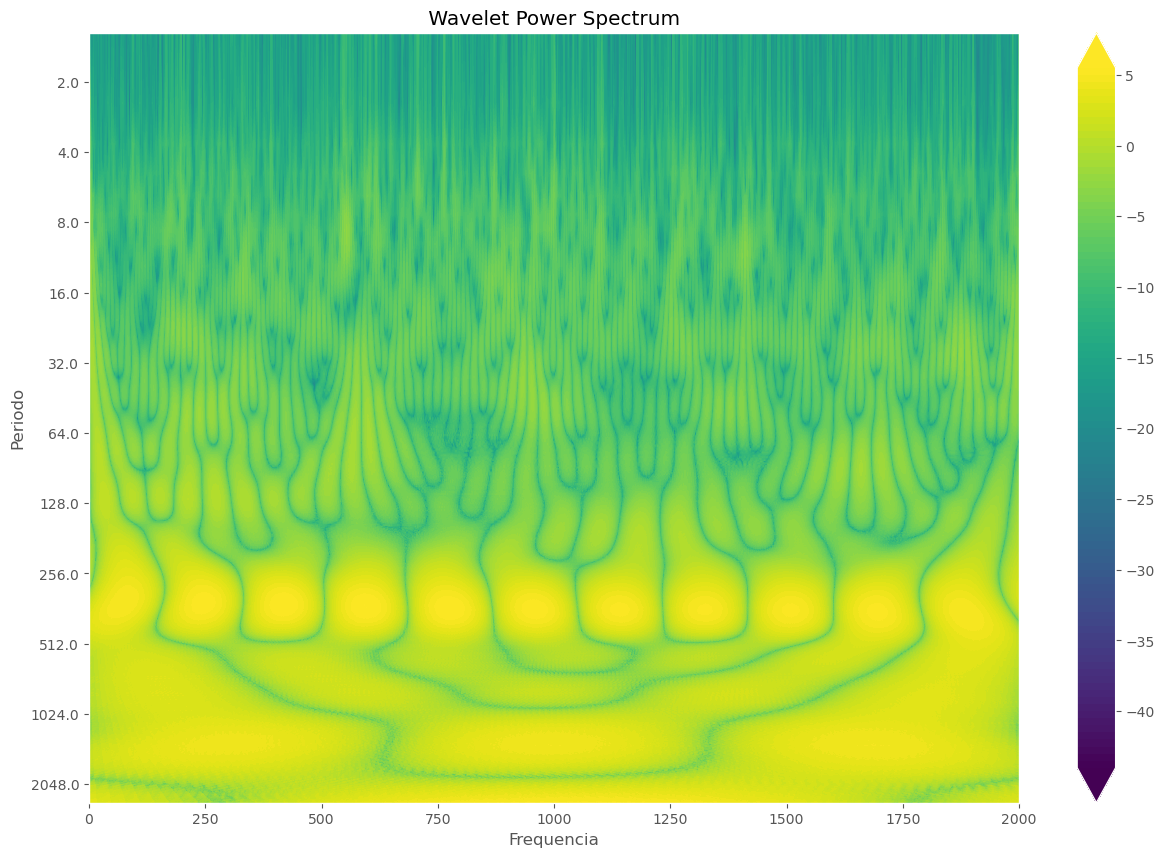

In [47]:
wavelet(ssti,time,filtro=False)

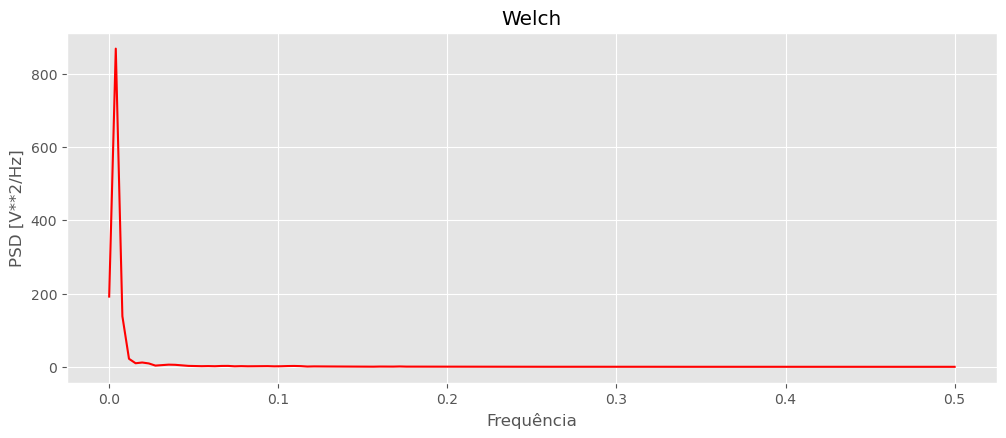

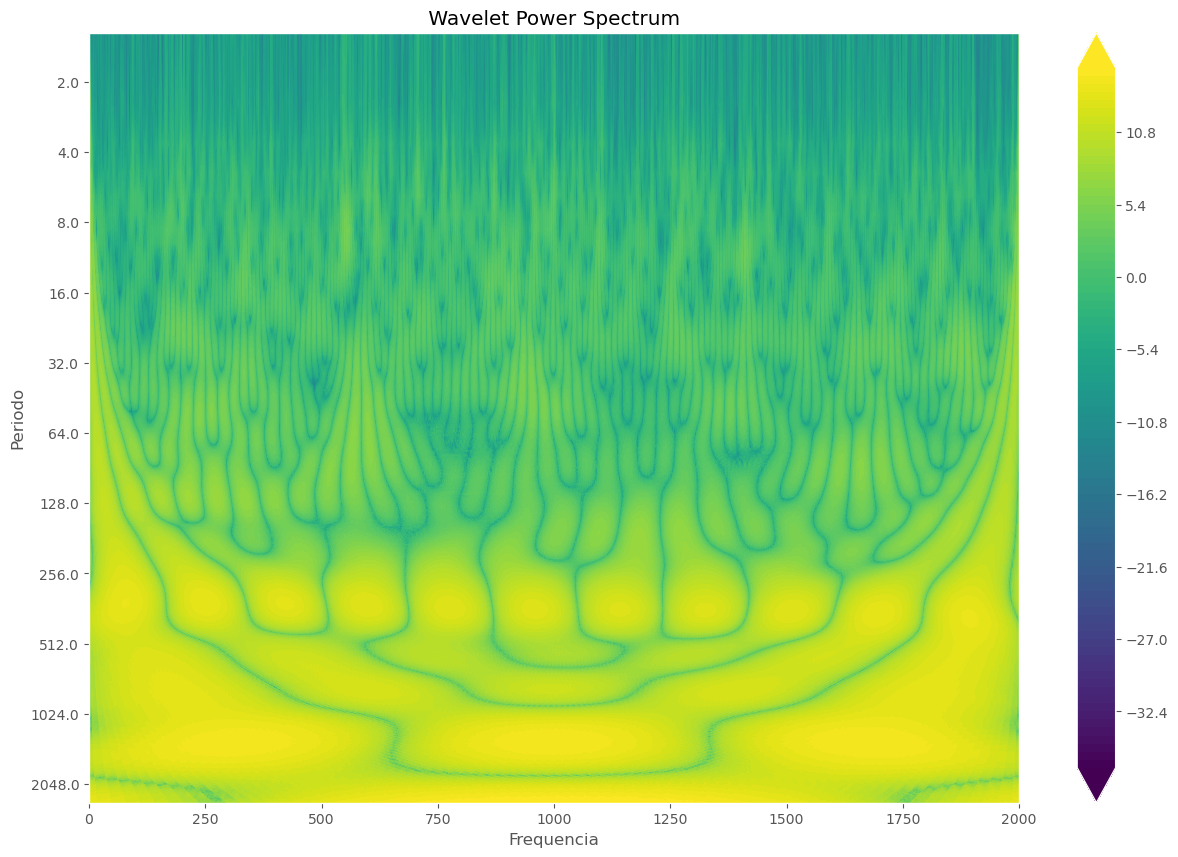

In [48]:
wavelet(ssti,time,filtro=False,normal=False)

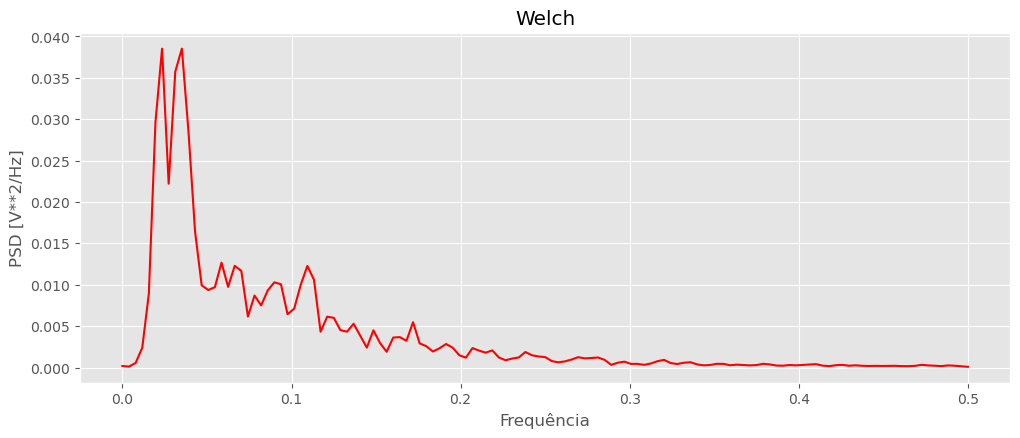

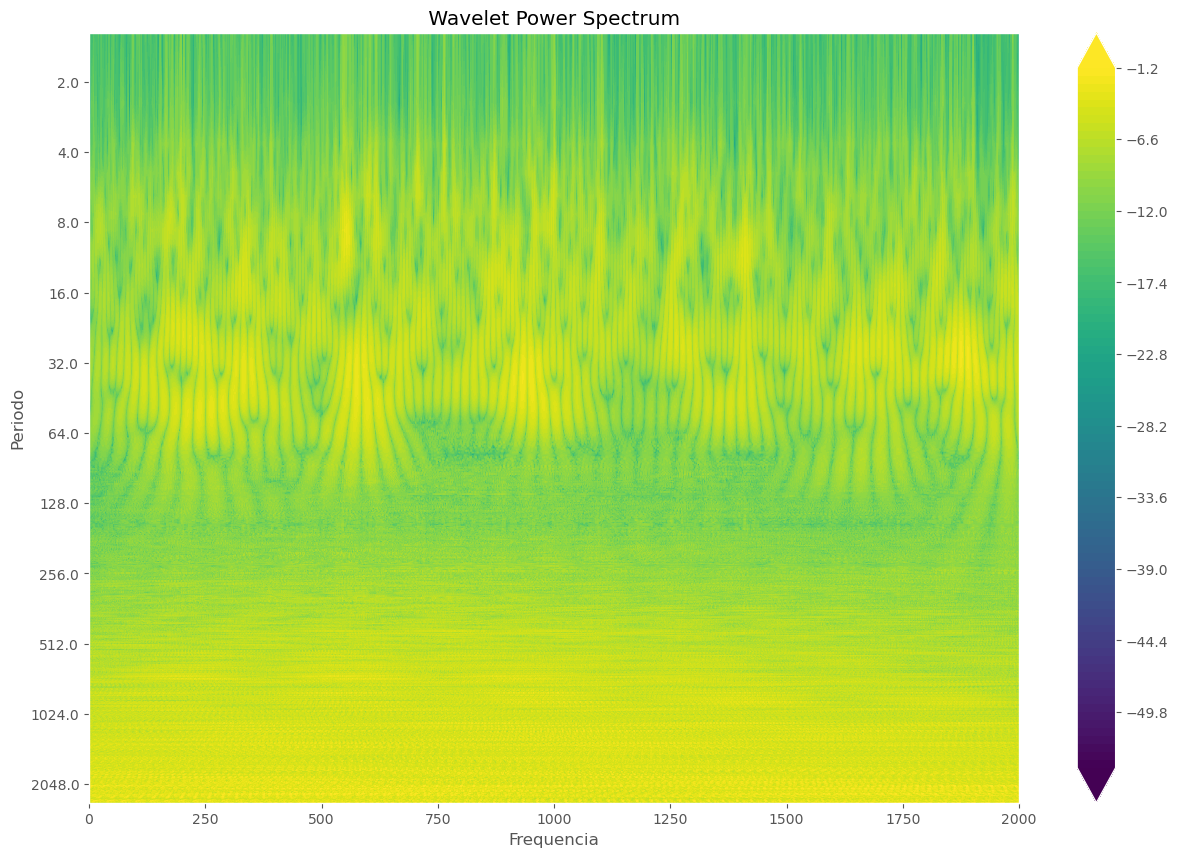

In [49]:
wavelet(ssti,time,alta=True)

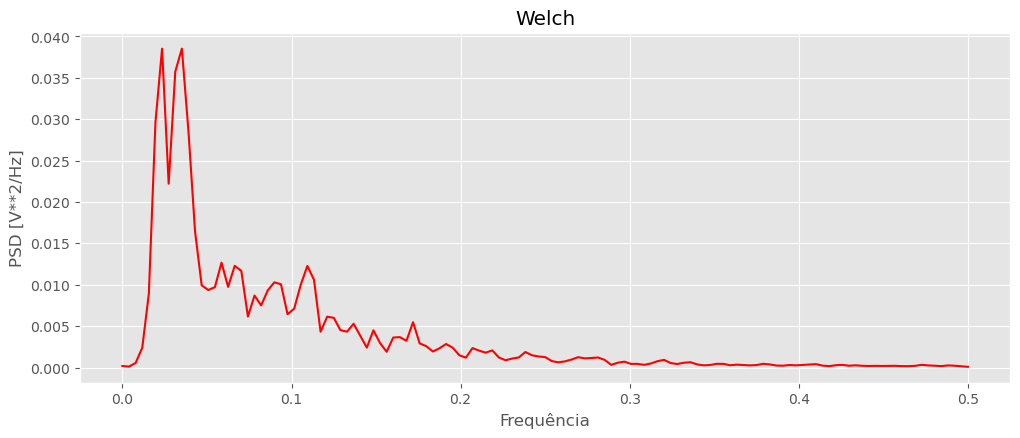

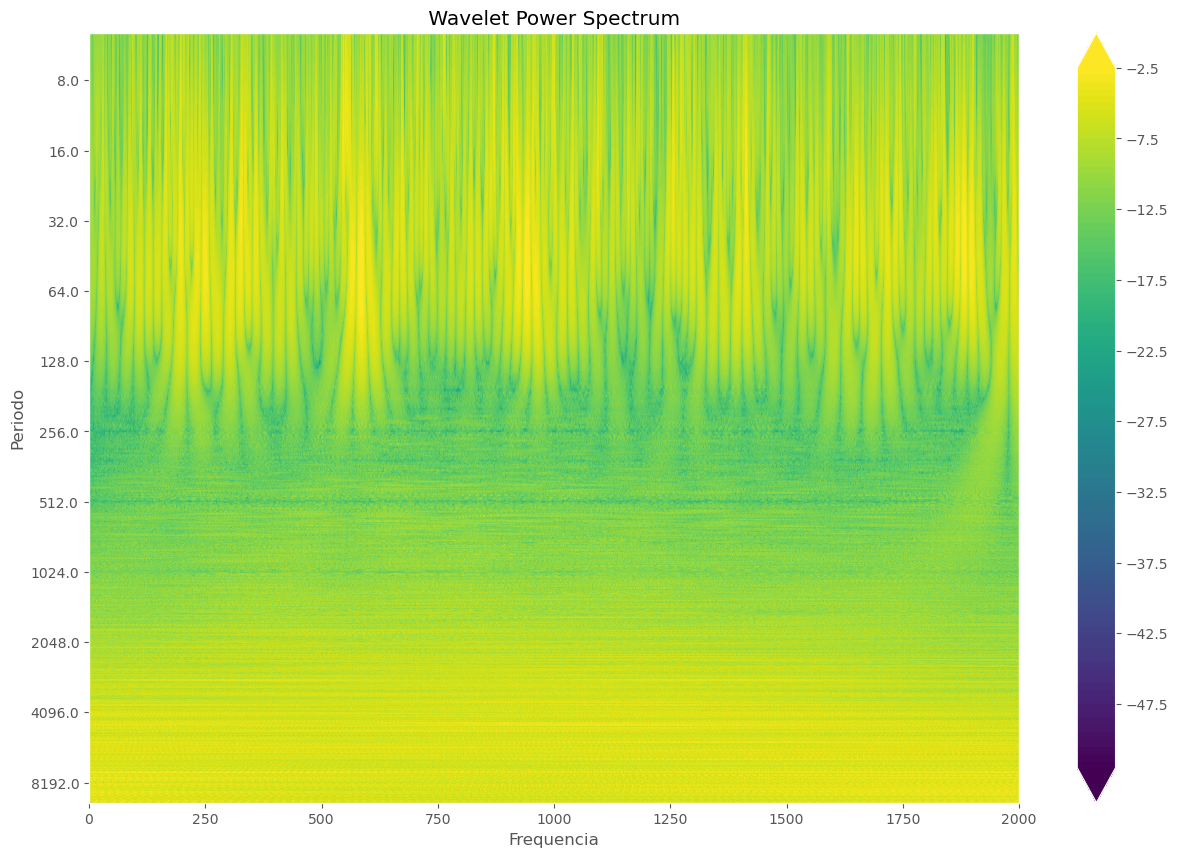

In [52]:
wavelet(ssti,time,alta=True,wavelet='gaus1')